# 종합실습1 단변량 분석

# 1.비즈니스 시나리오

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

* 고객사는 카시트를 판매하는 회사 입니다.
    * 최근 매출 하락에 대해 각 부서가 파악한 원인 다음과 같습니다. 
        * 최근에 경쟁사와의 가격 경쟁력이 하락하고 있고, 광고비용이 적절하게 집행되지 않음
        * 너무 국내 시장에 집중됨.
        * 지역마다의 구매력을 제대로 파악하지 못하고 있음.
    * 그러나 이러한 분석은 데이터에 근거하고 있는지 의문이 듭니다.

* 이 문제를 해결하고자 프로젝트 팀이 빌딩되었습니다. 
    * 여러분은 이 프로젝트팀에 데이터분석전문가 이자 AI 개발자로 참여하고 있습니다.
    * 드디어 AIVLE 과정에서 갈고 닦은 실력을 발휘할 기회가 주어졌습니다.
    * 자, 이제 단변량 분석을 통해 비즈니스 인사이트를 도출해 봅시다!


# 2.환경준비

## (1) 라이브러리 불러오기

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## (2) 데이터 로딩 : 카시트 판매량 데이터

|변수명|설명|구분|
|----|----|----|
|Sales| 각 지역 판매량(단위 : 1000개)|Target|
|CompPrice| 경쟁사 가격(단위 : 달러)|feature|
|Income| 지역 평균 소득(단위 : 1000달러)|feature|
|Advertising| 각 지역, 회사의 광고 예산(단위 : 1000달러)|feature|
|Population| 지역 인구수(단위 : 1000명)|feature|
|Price| 자사 지역별 판매가격|feature|
|ShelveLoc| 진열상태|feature|
|Age| 지역 인구의 평균 연령|feature|
|Urban| 도심 지역 여부(Yes,No)|feature|
|US| 매장이 미국에 있는지 여부(Yes,No)|feature|


In [15]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,No,Yes
397,7.41,162,26,12,368,159,Medium,40,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,Yes,Yes


# 3.단변량분석 : 숫자형 변수

## (1) Sales (Target) 

In [12]:
var = 'Sales'

1) 변수의 비즈니스 의미

* 각 지역 판매량(단위 : 1000개)
* Target

2) 기초통계량(수치화)

In [13]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

3) 분포 확인(시각화)

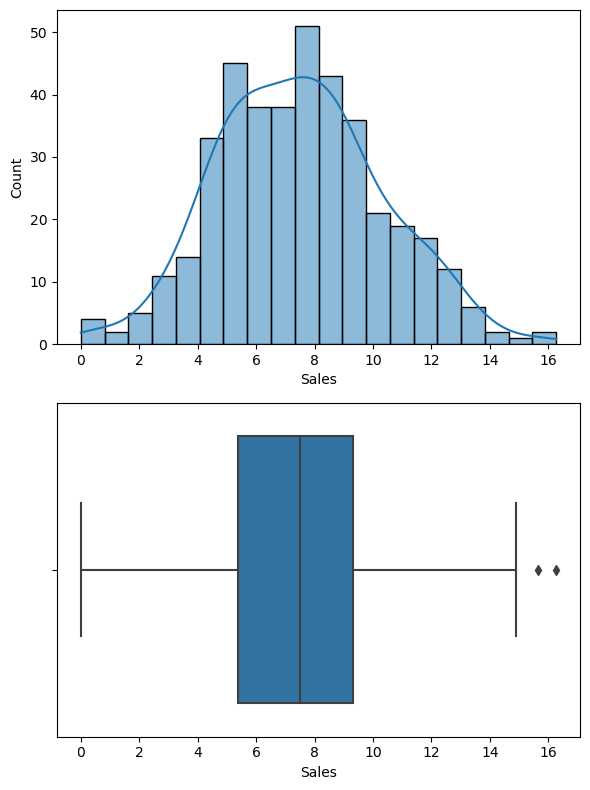

In [14]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(data[var], bins = 20, kde = True)

plt.subplot(2,1,2)
sns.boxplot(x = data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 대부분의 판매량이 5천개 ~ 만개 사이

5) 추가 분석해 볼 사항이 있나요?

* 판매량 구간을 0 ~ 4천, 4천 ~ 1만, 1만 이상 으로 구분해서 분석해 볼 필요 있음.

## (2) CompPrice

1) 변수의 비즈니스 의미

- 지역 경쟁 매장의 가격(단위 : 달러)
- feature

2) 기초통계량(수치화)

In [17]:
data[["CompPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
CompPrice,400.0,124.975,15.334512,77.0,115.0,125.0,135.0,175.0


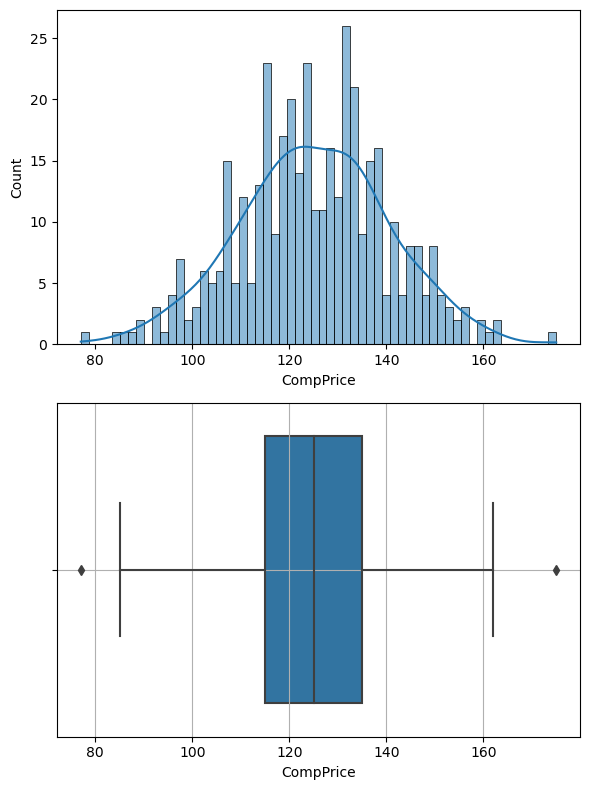

In [19]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(x = data["CompPrice"], bins = 60, kde = True)
plt.subplot(2,1,2)
sns.boxplot(x = data["CompPrice"])

plt.tight_layout()
plt.grid()
plt.show()

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 경쟁사의 50%가 115 ~ 135달러 사이에 분포, 평균 가격은 124달러, 최소 77달러, 최대 175달러 사이에 분포
- 각 지역 경쟁사 가격에 따라 판매량이 결정될듯?
- 제품 종류에 가격대가 차이 있지 않을까?

5) 추가 분석해 볼 사항이 있나요?

- 자사 지역별 판매가격이랑 합쳐서 분석해보면 어떨까?
- 전체 분포 비교
- 지역별 가격 비교

## (3) Income

In [28]:
var = "Income"

1) 변수의 비즈니스 의미

- 지역 평균 소득(단위 : 1000달러)

2) 기초통계량(수치화)

In [29]:
data[[var]].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


3) 분포 확인(시각화)

In [16]:
def eda1_n(data, var, bins):
    display(data[[var]].describe().T)
    plt.figure(figsize = (8,6))
    plt.subplot(2,1,1)
    sns.histplot(data[var], bins = bins, kde = True)
    plt.subplot(2,1,2)
    sns.boxplot(x = data[var])
    plt.grid()
    plt.tight_layout()
    plt.show()

,count,mean,std,min,25%,50%,75%,max
Income,400.0,68.6575,27.986037,21.0,42.75,69.0,91.0,120.0


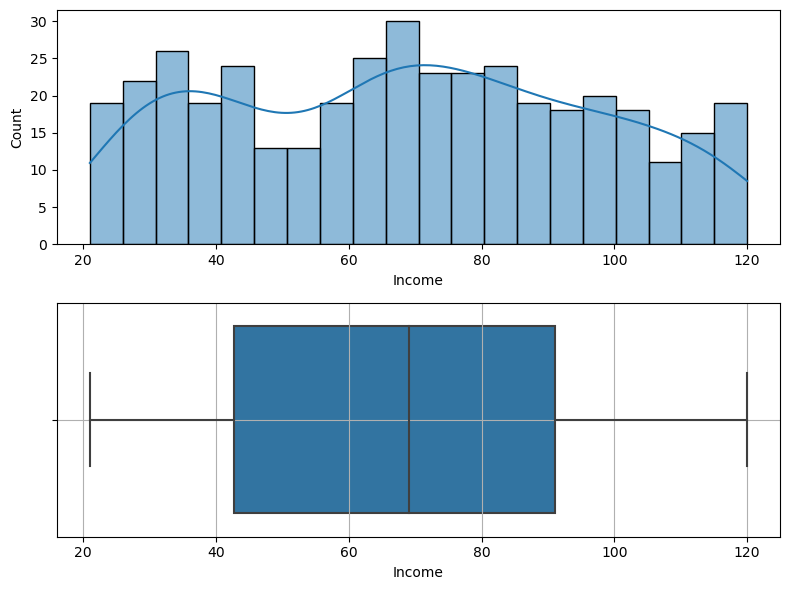

In [43]:
eda1_n(data, var, 60)

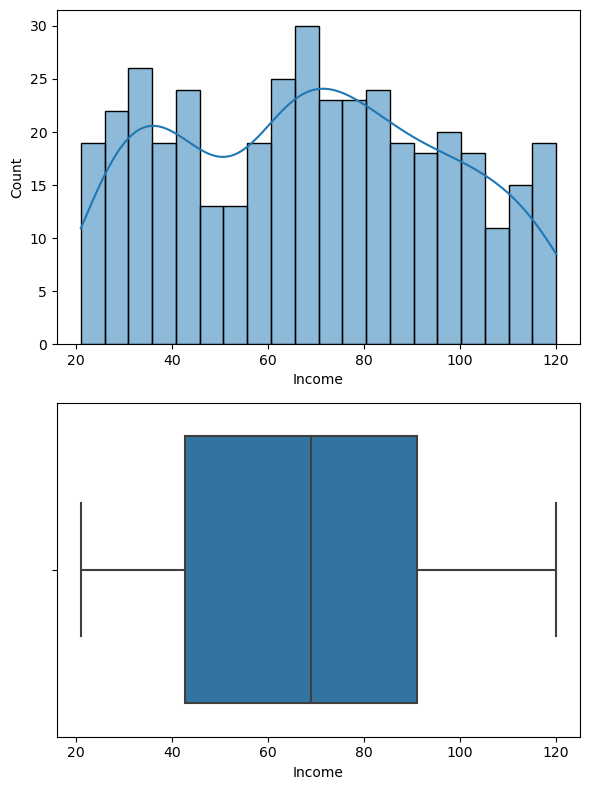

In [30]:
plt.figure(figsize = (6,8))
plt.subplot(2,1,1)
sns.histplot(x = data[var], bins = 20, kde = True)
plt.subplot(2,1,2)
sns.boxplot(x = data[var])

plt.tight_layout()
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 전 연령에 대한 인구별 평균 소득액? 성인에 대한 평균 소득액?
- 2만달러 ~ 12만 달러 이므로 연간 소득일 것
- 50%가 약 4만달러 ~ 9만달러

5) 추가 분석해 볼 사항이 있나요?

- 평균 소득과 카시트 판매량과의 관계
- 평균 소득과 카시트 가격과의 관계

## (4) Advertising

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Advertising,400.0,6.635,6.650364,0.0,0.0,5.0,12.0,29.0


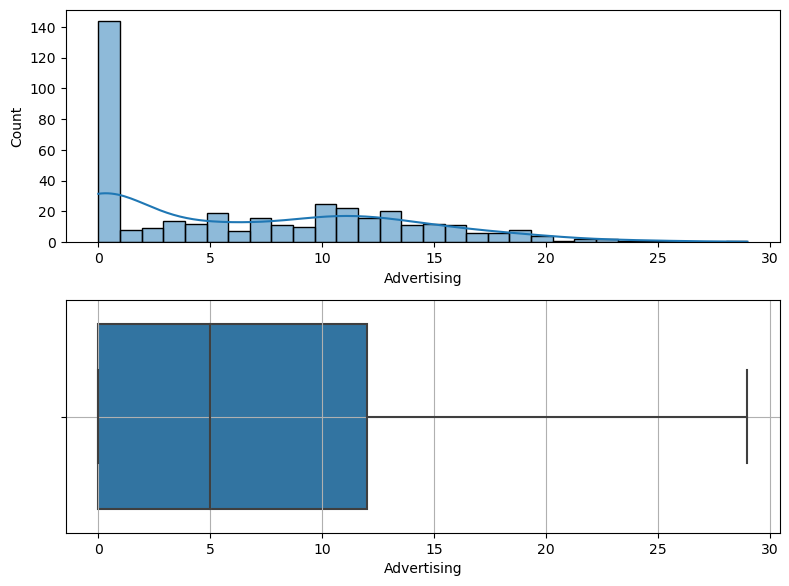

In [26]:
eda1_n(data, "Advertising", 30)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Advertising,256.0,10.367188,5.509879,1.0,6.0,10.0,14.0,29.0


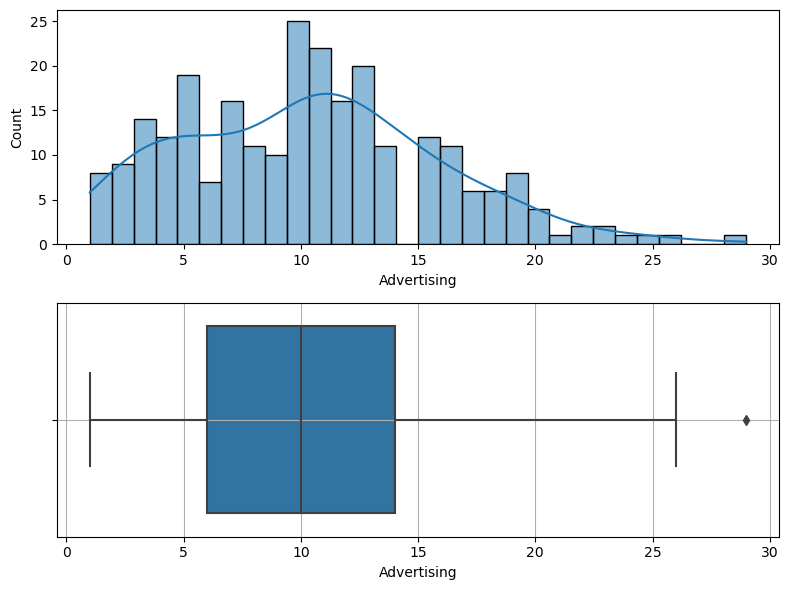

In [27]:
temp = data.loc[data["Advertising"] > 0]
eda1_n(temp, "Advertising", 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 광고비 예산이 0 인 지역이 전체에 36%

5) 추가 분석해 볼 사항이 있나요?

- 광고비 예산 0을 제외하고 분포 확인 필요

- 확인 결과 광고비 5천달러 이내와 이후로 분포가 나뉨
- 광고비 0, 5천달러 이내, 5천달러 이상으로 구분하고 광고비 예산 구분, 지역, 소득수준, 인구수 등과 비교할 필요 있음

## (5) Population

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Population,400.0,264.84,147.376436,10.0,139.0,272.0,398.5,509.0


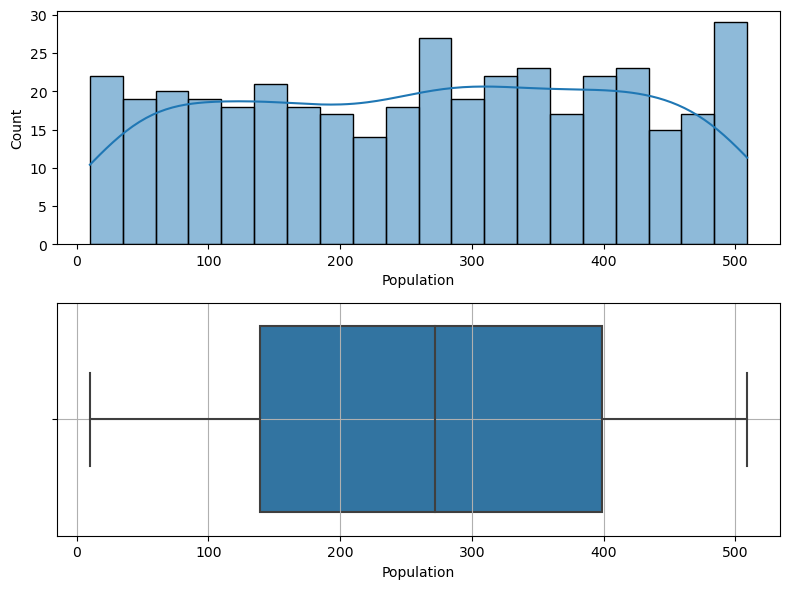

In [57]:
eda1_n(data, "Population", 30)

3) 분포 확인(시각화)

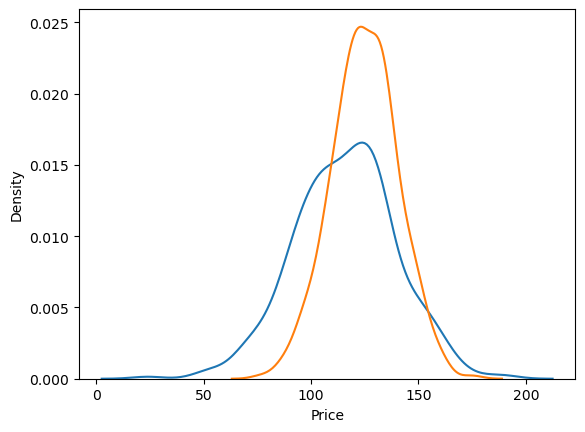

In [46]:
#겹쳐서 볼 때는 kdeplot이 좋다
sns.kdeplot(x = "Price", data = data)
sns.kdeplot(x = "CompPrice", data = data)
plt.show()

In [ ]:
#타사가 좀 더 중앙에 몰려있다...?

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 인구수가 거의 균등분포를 나타낸다 왜?

5) 추가 분석해 볼 사항이 있나요?

- 인구수에 따른 판매량 관계
- 인구수와 평균연령의 관계

## (6) Price

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

,count,mean,std,min,25%,50%,75%,max
Price,400.0,115.795,23.676664,24.0,100.0,117.0,131.0,191.0


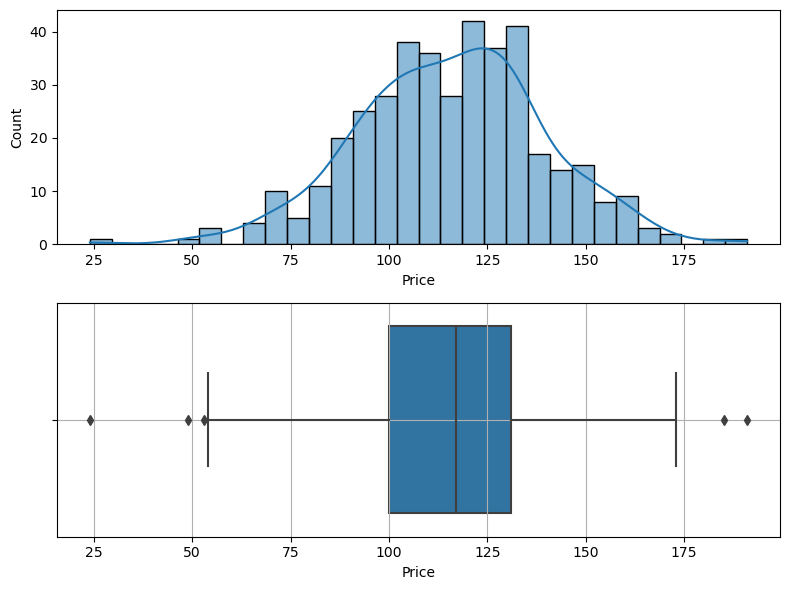

In [21]:
eda1_n(data, "Price", 30)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 가격대가 24 ~ 191 달러로 경쟁사보다 범위가 넓다
- 50%는 100 ~ 130 사이

5) 추가 분석해 볼 사항이 있나요?

- 가격에 따라 판매량은 달라질까?
- 자사 가격과 경쟁사 가격 비교

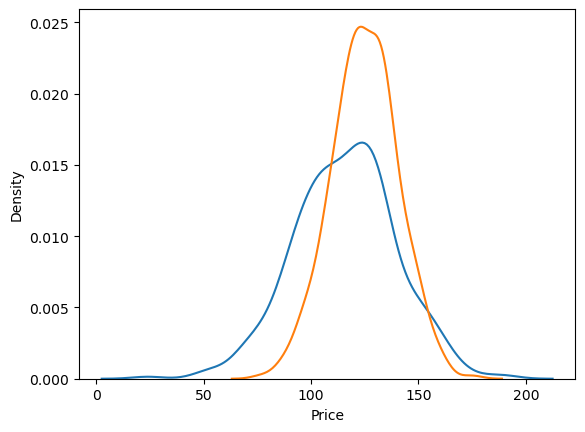

In [25]:
sns.kdeplot(x = "Price", data = data) #파랑
sns.kdeplot(x = "CompPrice", data = data) #주황
plt.show()

## (7) Age

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

,count,mean,std,min,25%,50%,75%,max
Age,400.0,53.3225,16.200297,25.0,39.75,54.5,66.0,80.0


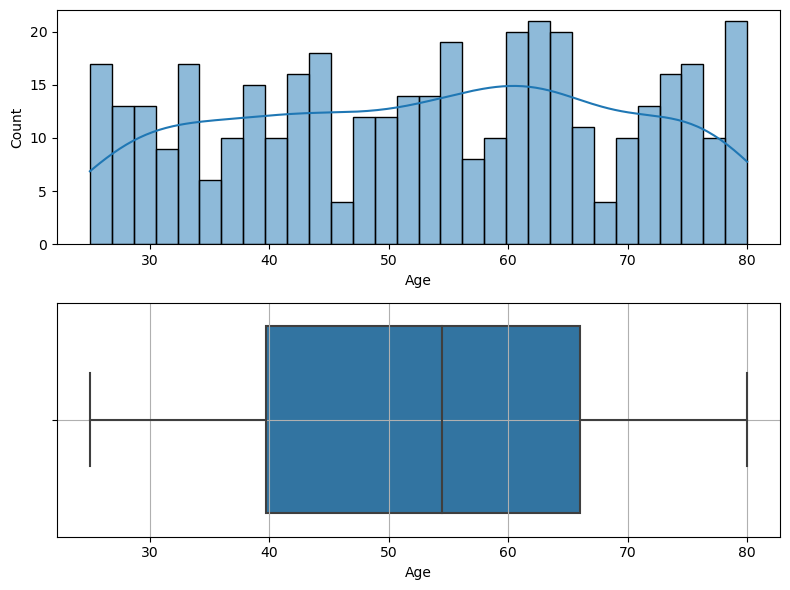

In [60]:
eda1_n(data, "Age", 30)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 지역별 평균나이는 거의 균등분포로 보임
- 균등분포 ==> 임의로 이렇게 모았거나, 여러 분포가 섞였거나, 이상치를 처리했거나
- 평균 나이
    - 지역 인구 전체에 대한 평균
    - 카시트가 필요한 사람은, 약 10세 이하 자녀를 둔 부모
    - 10세 이하 자녀들과 20대후반 ~ 40세의 부모가 주축인 인구의 평균 나이

5) 추가 분석해 볼 사항이 있나요?

- 가장 판매량이 높은 평균 나이

# 4.단변량분석 : 범주형 변수

## (1) ShelveLoc

In [8]:
var = 'ShelveLoc'

1) 변수의 비즈니스 의미

* 매장 진열상태

2) 기초통계량(수치화)

In [9]:
# 범주별 빈도수
print(data[var].value_counts())

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [10]:
# 범주별 비율
def eda1_c(data, var):
    print(data[var].value_counts())
    print(data[var].value_counts() / data[var].shape[0])
    sns.countplot(x = data[var])
    plt.grid()
    plt.show()

3) 분포 확인(시각화)

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


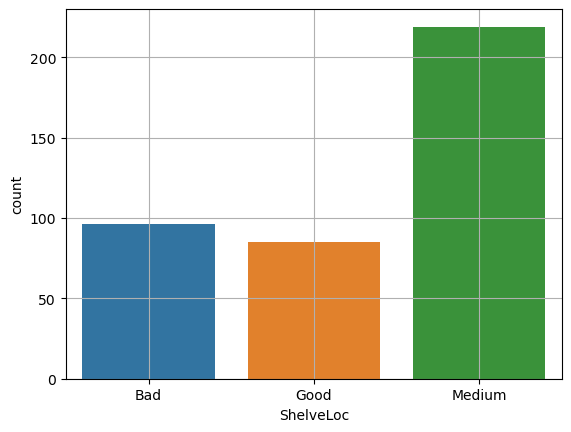

In [11]:
eda1_c(data, "ShelveLoc")

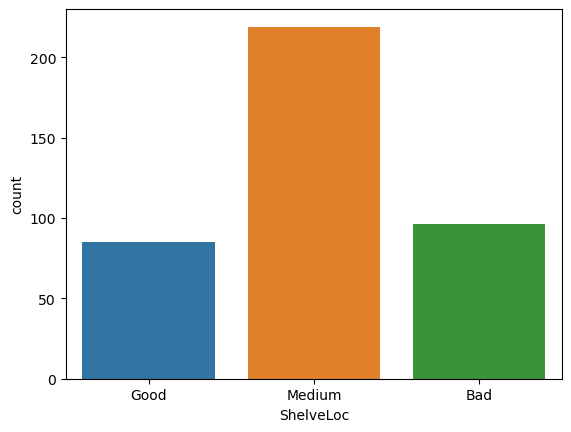

In [13]:
sns.countplot(x = data[var], order = ['Good','Medium','Bad'])
plt.show()

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 진열 상태가 중간 정도 가 54%

5) 추가 분석해 볼 사항이 있나요?

* 진열상태에 따른 판매량 차이
* 지역, 인구수와 진열 상태 관계 비교

## (2) Urban

Yes    282
No     118
Name: Urban, dtype: int64
Yes    0.705
No     0.295
Name: Urban, dtype: float64


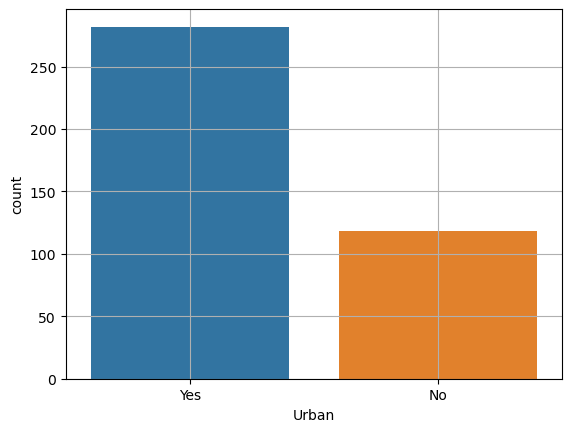

In [54]:
eda1_c(data, "Urban")

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 약 70% 매장이 도시에 있다

5) 추가 분석해 볼 사항이 있나요?

- 도시와 지방의 인구수, 소득수준, 자사 가격, 경쟁사 가격, 광고예산, 판매량 비교 필요

## (3) US

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


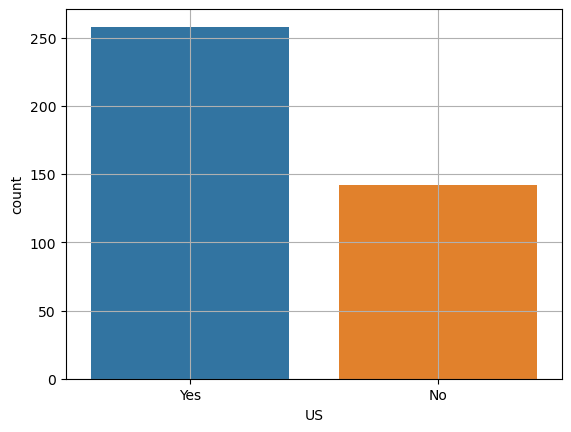

In [55]:
eda1_c(data, "US")

1) 변수의 비즈니스 의미

2) 기초통계량(수치화)

3) 분포 확인(시각화)

4) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

- 약 65%가 국내(미국)

5) 추가 분석해 볼 사항이 있나요?

- 국내외와 광고비, 판매가, 경쟁사가격, 매출액 등 비교